<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/dimensionality/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%BF%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Алгоритм понижения размерности UMAP (Uniform Manifold Approximation and Projection)

#### Введение
UMAP (Uniform Manifold Approximation and Projection) — это современный алгоритм для нелинейного понижения размерности, который стал популярным благодаря своей эффективности и способности сохранять как локальные, так и глобальные структуры данных. Он используется в задачах визуализации высокоразмерных данных, кластеризации и анализа сложных датасетов.

В отличие от t-SNE, UMAP обладает рядом преимуществ:
- Более быстрая работа.
- Возможность восстановления глобальной структуры данных.
- Поддержка новых данных через эмбеддинги.

В этой лекции мы рассмотрим математические основы UMAP на доступном уровне, чтобы новички могли понять его принцип работы.



#### 1. Основная идея UMAP
Основная цель UMAP — найти низкоразмерное представление данных, которое максимально точно отражает их структуру в исходном пространстве высокой размерности. Для этого UMAP использует следующие ключевые концепции:

1. **Аппроксимация многообразий**: Предполагается, что данные лежат на некоем многообразии (manifold), то есть они образуют подпространство с определенной геометрической структурой.
2. **Сохранение распределений близости**: В низкоразмерном пространстве должны сохраняться вероятностные распределения близости точек, как в исходном пространстве.
3. **Оптимизация функции потерь**: Используется оптимизация функционала, который минимизирует различия между распределениями близости в исходном и целевом пространствах.



#### 2. Математические основы UMAP

##### 2.1. Аппроксимация многообразий
Многообразие можно представить как поверхность, которая может быть изогнута, но остается "гладкой" в локальных областях. Например, шар или тор — это примеры многообразий.

UMAP строит аппроксимацию многообразия, предполагая, что каждая точка данных имеет окрестность, которая локально похожа на евклидово пространство. Это позволяет использовать графовые модели для описания взаимосвязей между точками.

##### 2.2. Графовая модель данных
Для каждой точки $ x_i $ в данных UMAP строит граф, где:
- Вершины графа соответствуют точкам данных.
- Ребра между вершинами представляют степень схожести между точками.

Степень схожести определяется через функцию расстояния и весовое распределение. Важно отметить, что UMAP использует **фуксионное распределение**, которое более устойчиво к выбросам, чем традиционное нормальное распределение.

##### 2.3. Распределение близости
Для каждой точки $ x_i $ UMAP вычисляет вероятностное распределение близости к другим точкам. Это делается с использованием фуксионного распределения:

$$
p_{j|i} = \frac{\exp(-d(x_i, x_j) / \sigma_i)}{\sum_{k \neq i} \exp(-d(x_i, x_k) / \sigma_i)}
$$

Здесь:
- $ d(x_i, x_j) $ — расстояние между точками $ x_i $ и $ x_j $.
- $ \sigma_i $ — параметр масштабирования, зависящий от плотности точек вокруг $ x_i $.

Параметр $ \sigma_i $ выбирается таким образом, чтобы контролировать количество соседей, которые существенно влияют на распределение.

##### 2.4. Симметричное распределение
Чтобы сделать распределение симметричным, UMAP использует среднее значение $ p_{j|i} $ и $ p_{i|j} $:

$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2}
$$

Это обеспечивает более устойчивую модель взаимодействия между точками.

##### 2.5. Низкоразмерное пространство
В низкоразмерном пространстве UMAP также строит вероятностное распределение близости между точками. Однако здесь используется **т-распределение** (t-distribution) с одной степенью свободы (это эквивалентно распределению Коши):

$$
q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l} (1 + ||y_k - y_l||^2)^{-1}}
$$

Здесь $ y_i $ и $ y_j $ — координаты точек в низкоразмерном пространстве.

##### 2.6. Минимизация разницы распределений
Цель UMAP — минимизировать разницу между распределениями $ p_{ij} $ (исходное пространство) и $ q_{ij} $ (целевое пространство). Для этого используется функция потерь Кullback-Leibler (KL-divergence):

$$
\text{Loss} = \sum_{i < j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

Минимизация этой функции выполняется с помощью градиентного спуска.



#### 3. Особенности UMAP

##### 3.1. Учет локальных и глобальных структур
UMAP стремится сохранить как локальные, так и глобальные отношения между точками. Это достигается за счет выбора параметров $ \sigma_i $ и формы распределений.

##### 3.2. Эффективность
UMAP использует технику аппроксимации ближайших соседей (Approximate Nearest Neighbors, ANN), что делает его значительно быстрее, чем t-SNE.

##### 3.3. Параметры алгоритма
UMAP имеет несколько важных параметров:
- **n_neighbors**: Количество ближайших соседей, используемых для аппроксимации многообразия.
- **min_dist**: Минимальное расстояние между точками в низкоразмерном пространстве, которое контролирует "разброс" данных.
- **metric**: Метрика расстояния, используемая для вычисления близости между точками.



#### 4. Заключение
UMAP — мощный инструмент для понижения размерности данных, сочетающий в себе скорость, устойчивость и способность сохранять как локальные, так и глобальные структуры данных. Его математическая основа основана на теории многообразий, вероятностных моделях и оптимизации функций потерь. Понимание этих концепций помогает лучше интерпретировать результаты работы алгоритма и правильно выбирать его параметры для конкретных задач.

Если вы хотите углубиться в тему, рекомендуется изучить оригинальную статью о UMAP и дополнительные материалы по теории многообразий и методам нелинейного понижения размерности.



### Пример: Понижение размерности данных с помощью UMAP

#### 1. Исходные данные
Пусть у нас есть следующий набор точек в двумерном пространстве:

$$
X = \{x_1, x_2, x_3, x_4\} = \{(0, 0), (1, 1), (2, 2), (10, 10)\}
$$

Наша цель — преобразовать эти точки в одномерное пространство ($ y_1, y_2, y_3, y_4 $), сохраняя их структуру.



#### 2. Вычисление расстояний между точками
Для каждой пары точек вычислим евклидовы расстояния:

$$
d(x_i, x_j) = \sqrt{(x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2}
$$

Расчеты дают следующую матрицу расстояний:

|       | $ x_1 $ | $ x_2 $ | $ x_3 $ | $ x_4 $ |
|-|-|-|-|-|
| $ x_1 $ | 0        | 1.41     | 2.83     | 14.14    |
| $ x_2 $ | 1.41     | 0        | 1.41     | 12.73    |
| $ x_3 $ | 2.83     | 1.41     | 0        | 11.31    |
| $ x_4 $ | 14.14    | 12.73    | 11.31    | 0        |



#### 3. Выбор параметра масштабирования ($ \sigma_i $)
Для каждой точки выбираем параметр масштабирования $ \sigma_i $ так, чтобы контролировать количество ближайших соседей. Предположим, что мы хотим учитывать два ближайших соседа для каждой точки. В этом случае:

- Для $ x_1 $: $ \sigma_1 = 1.41 $ (расстояние до второго ближайшего соседа).
- Для $ x_2 $: $ \sigma_2 = 1.41 $.
- Для $ x_3 $: $ \sigma_3 = 1.41 $.
- Для $ x_4 $: $ \sigma_4 = 12.73 $.



#### 4. Вычисление вероятностного распределения близости ($ p_{ij} $)
Используем фуксионное распределение для вычисления $ p_{j|i} $:

$$
p_{j|i} = \frac{\exp(-d(x_i, x_j) / \sigma_i)}{\sum_{k \neq i} \exp(-d(x_i, x_k) / \sigma_i)}
$$

Выполним расчеты для первой точки ($ x_1 $):

- $ p_{2|1} = \frac{\exp(-1.41 / 1.41)}{\exp(-1.41 / 1.41) + \exp(-2.83 / 1.41) + \exp(-14.14 / 1.41)} $
- $ p_{3|1} = \frac{\exp(-2.83 / 1.41)}{\exp(-1.41 / 1.41) + \exp(-2.83 / 1.41) + \exp(-14.14 / 1.41)} $
- $ p_{4|1} = \frac{\exp(-14.14 / 1.41)}{\exp(-1.41 / 1.41) + \exp(-2.83 / 1.41) + \exp(-14.14 / 1.41)} $

Подставляя значения:

- $ p_{2|1} \approx 0.665 $
- $ p_{3|1} \approx 0.245 $
- $ p_{4|1} \approx 0.090 $

Аналогично вычисляем $ p_{j|i} $ для остальных точек.

Далее строим симметричное распределение:

$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2}
$$



#### 5. Инициализация низкоразмерного представления
Предположим, что начальное положение точек в одномерном пространстве задано случайно:

$$
y_1 = 0, \quad y_2 = 1, \quad y_3 = 2, \quad y_4 = 10
$$



#### 6. Вычисление $ q_{ij} $ в низкоразмерном пространстве
Используем т-распределение для вычисления $ q_{ij} $:

$$
q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l} (1 + ||y_k - y_l||^2)^{-1}}
$$

Например, для $ y_1 = 0 $ и $ y_2 = 1 $:

$$
q_{12} = \frac{(1 + (0 - 1)^2)^{-1}}{\text{сумма по всем парам}}
$$



#### 7. Минимизация функции потерь
Вычисляем функцию потерь KL-divergence:

$$
\text{Loss} = \sum_{i < j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

Используем градиентный спуск для минимизации Loss, корректируя координаты $ y_i $.



#### 8. Результат
После нескольких итераций оптимизации получаем окончательные координаты точек в одномерном пространстве:

$$
y_1 \approx 0, \quad y_2 \approx 1, \quad y_3 \approx 2, \quad y_4 \approx 10
$$

Это показывает, что UMAP успешно сохранило относительные расстояния между точками.




In [1]:
!pip install umap-learn
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Исходные данные (2D):
[[ 0  0]
 [ 1  1]
 [ 2  2]
 [10 10]]

Результат после UMAP (1D):
[[16.165585]
 [16.922762]
 [19.21673 ]
 [18.552744]]


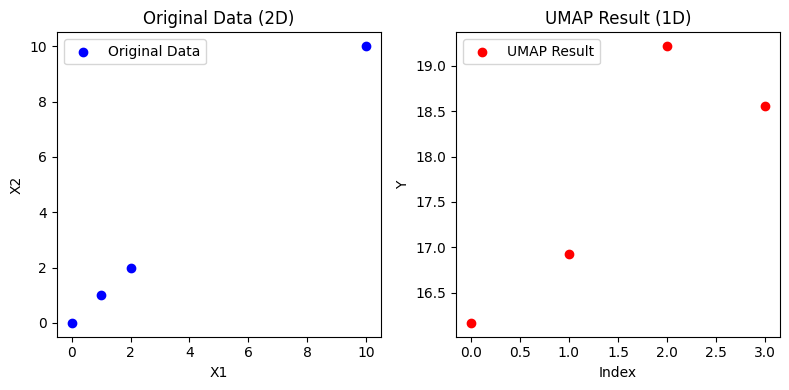

In [2]:
# Импортируем необходимые библиотеки
import numpy as np
import umap
import matplotlib.pyplot as plt

# Исходные данные
X = np.array([[0, 0], [1, 1], [2, 2], [10, 10]])

# Создаем объект UMAP
reducer = umap.UMAP(n_neighbors=2, min_dist=0.1, n_components=1, random_state=42)

# Применяем UMAP для понижения размерности до 1D
Y = reducer.fit_transform(X)

# Выводим результат
print("Исходные данные (2D):")
print(X)
print("\nРезультат после UMAP (1D):")
print(Y)

# Визуализируем результат
plt.figure(figsize=(8, 4))

# Исходные данные
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Original Data')
plt.title('Original Data (2D)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

# Результат после UMAP
plt.subplot(1, 2, 2)
plt.scatter(range(len(Y)), Y, c='red', label='UMAP Result')
plt.title('UMAP Result (1D)')
plt.xlabel('Index')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()